# 기술통계 연구과제

## 문제 1

다음 데이터는 조선시대 역대 왕의 수명을 조사한 데이터의 일부이다.

수명에 대해 기술통계량을 구하고 상자그림을 그려라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

> https://data.hossam.kr/pydata/kings_life.xlsx

| 왕  | 태조 | 정종 | 태종 | 세종 | 문종 | 단종 | 세조 | 예종 | 성종 | 연산 | 중종 | 인종 |
|----|----|----|----|----|----|----|----|----|----|----|----|----|
| 수명 | 73 | 62 | 45 | 53 | 38 | 16 | 51 | 28 | 37 | 30 | 56 | 30 |

> 실제 엑셀 파일에는 위 표의 전치 형태로 저장되어 있습니다.

In [62]:
import sys
from pandas import read_excel, melt, pivot_table, crosstab
from matplotlib import pyplot as plt

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 9
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.unicode_minus"] = False

In [12]:
origin = read_excel("./연구과제 데이터/kings_life.xlsx", index_col="왕")
origin.sort_values(by = "수명",ascending=True, inplace=True)

origin

,수명
왕,
단종,16
헌종,22
예종,28
연산,30
인종,30
철종,32
명종,33
현종,33
경종,36


In [15]:
origin['수명'].quantile(0.75)

56.0

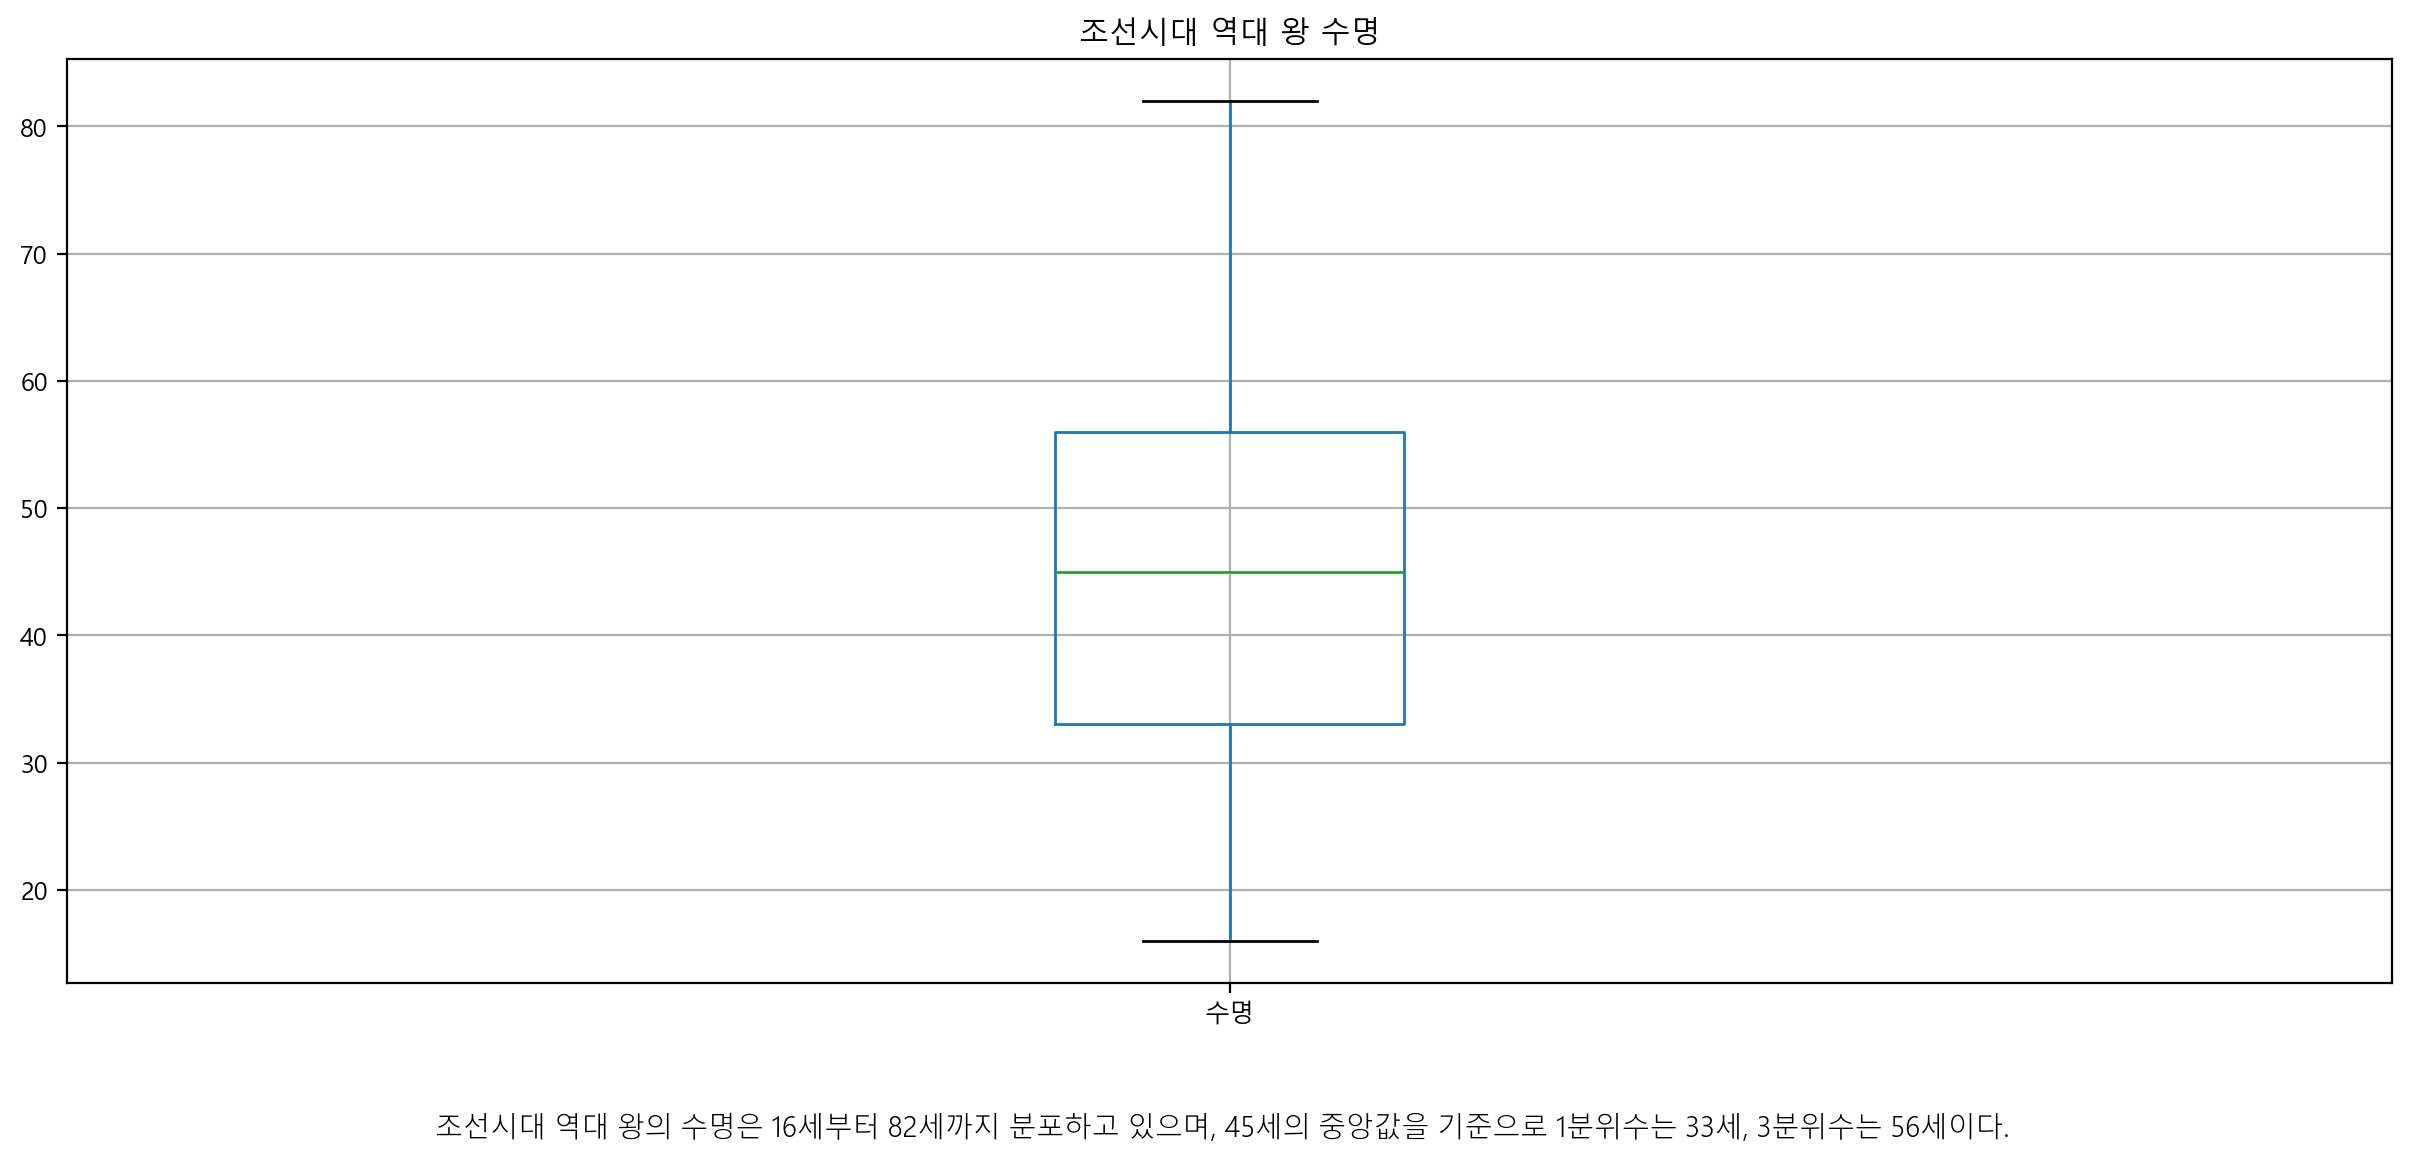

In [16]:
plt.grid()
origin.boxplot('수명', sym='r^', figsize=(5, 10))
plt.title("조선시대 역대 왕 수명")

txt = """조선시대 역대 왕의 수명은 16세부터 82세까지 분포하고 있으며, 45세의 중앙값을 기준으로 1분위수는 33세, 3분위수는 56세이다."""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 10, "weight": "light"})

plt.show()
plt.close()

## 문제2

다음은 상장된 금융사 중 외국기업(F)과 내국기업(K)의 주가 데이터의 일부이다.

외국기업과 내국기업별로 기술통계량을 상자그림을 그려서 비교/분석하라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

> https://data.hossam.kr/pydata/stock.xlsx

| 구분 | F   | K   | K   | F   | K   | K   | K   | K   | K   | F   | F   | F   | F   | F   |
|----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| 주가 | 120 | 165 | 147 | 144 | 135 | 161 | 102 | 165 | 170 | 147 | 235 | 161 | 139 | 150 |

> 실제 엑셀 파일에는 위 표의 전치 형태로 저장되어 있습니다.

In [25]:
import seaborn as sb

In [155]:
origin = read_excel("./연구과제 데이터/stock.xlsx")
df = origin.astype({"구분": "category", "주가":"int"})
df.set_index('구분')

,주가
구분,
F,120
K,165
K,147
F,144
K,135
K,161
K,102
K,165
K,170


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32508\2720235202.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=df, x='구분', y='주가', palette="muted", ax=ax)


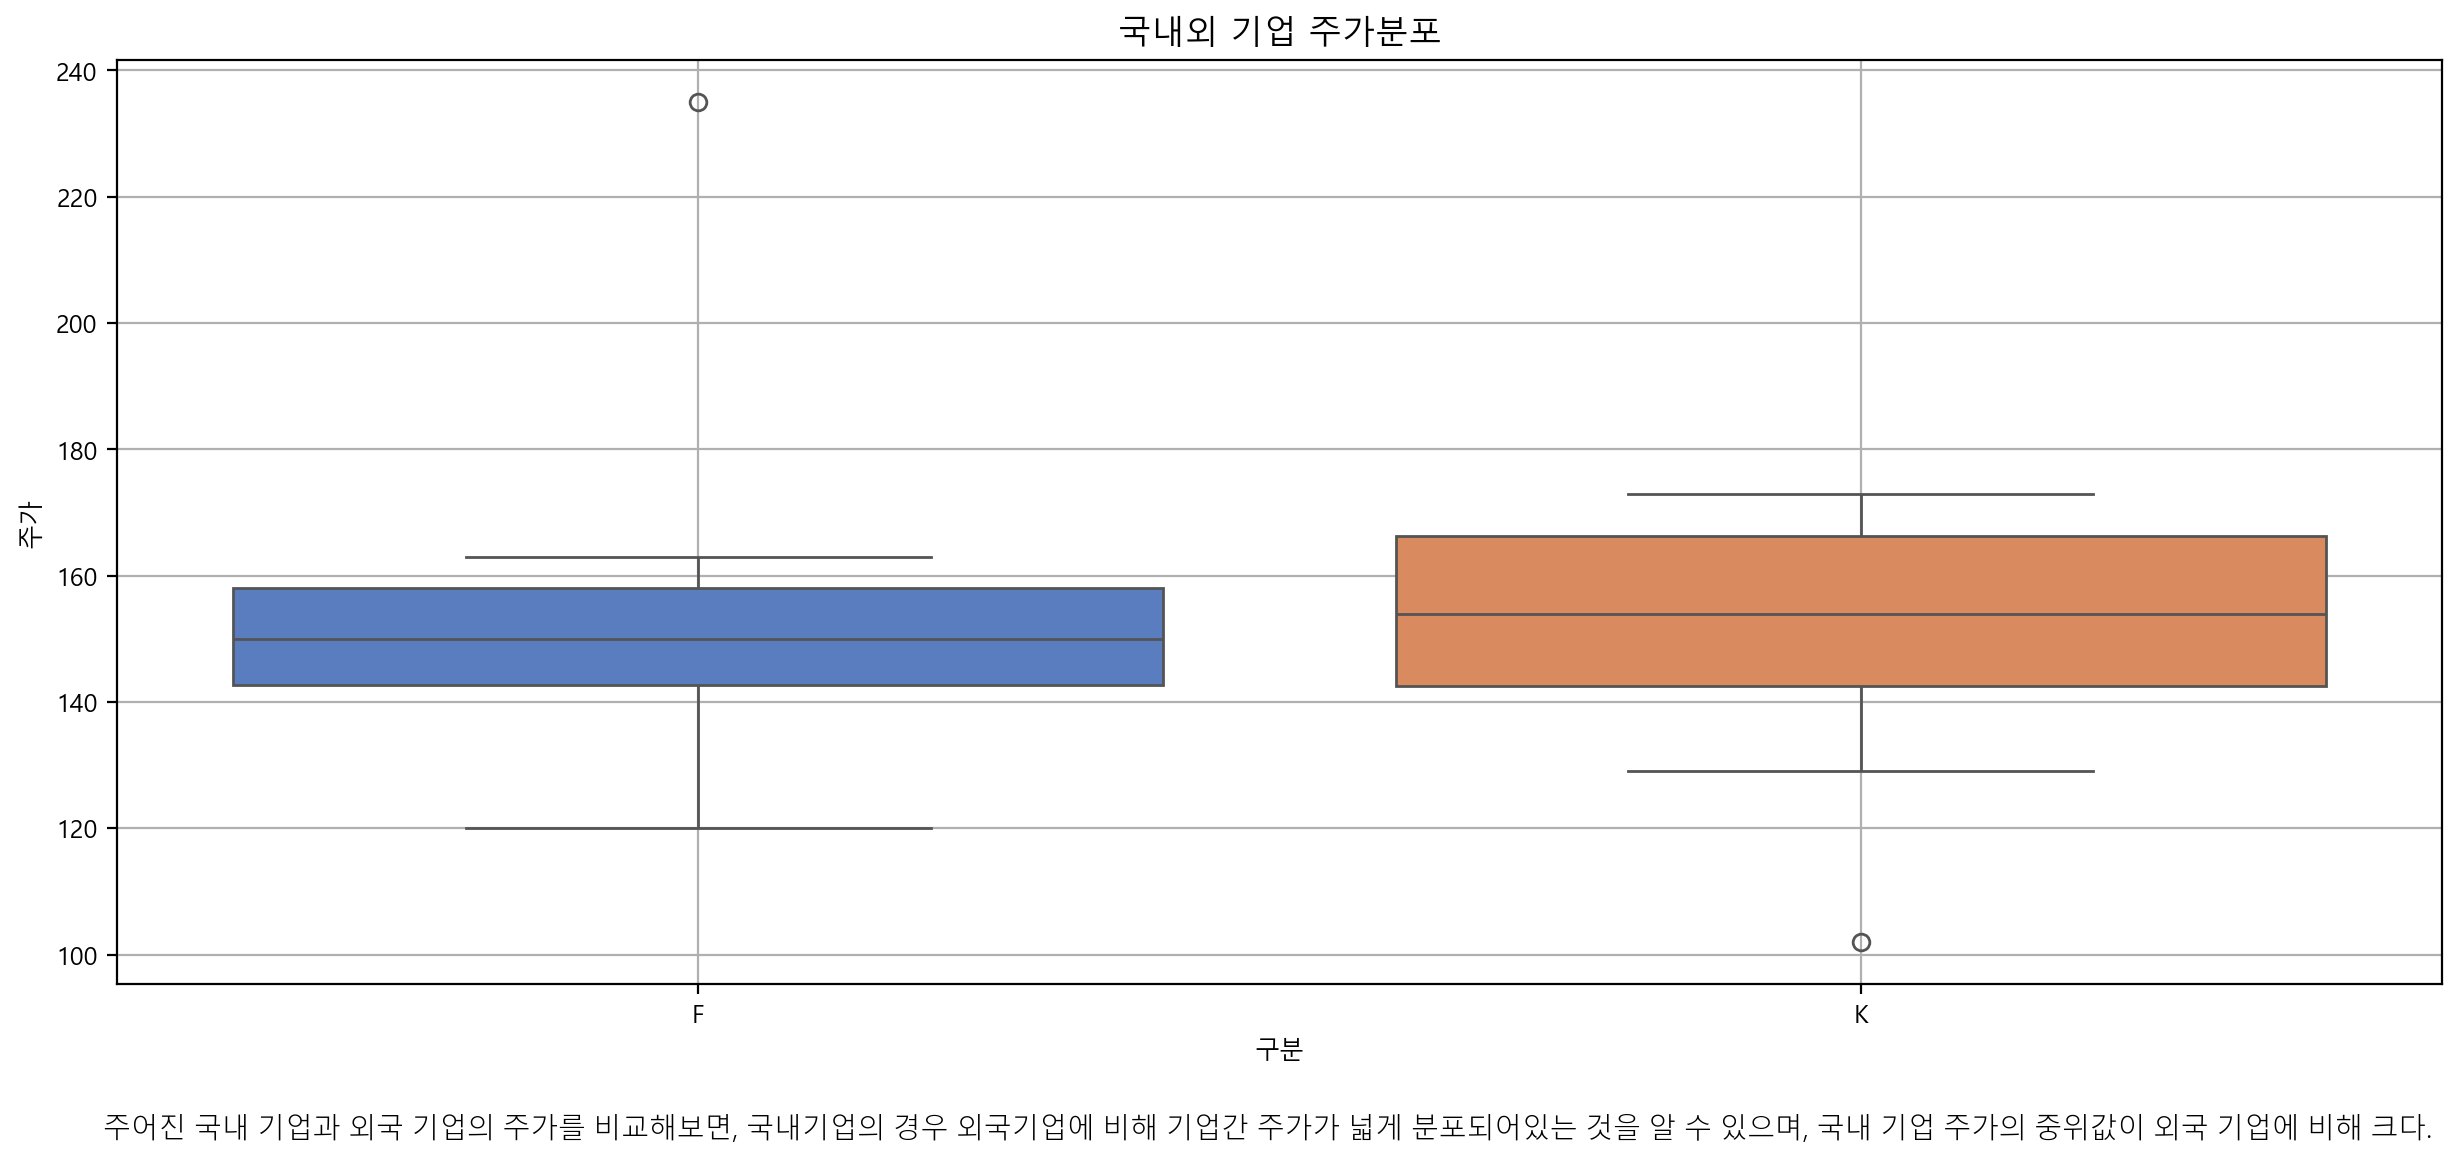

In [157]:
fig, ax = plt.subplots(1, 1)
# fig, ax2 = plt.subplots(1,1)   독립된 서브플롯


# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.boxplot(data=df, x='구분', y='주가', palette="muted", ax=ax)


ax.title.set_text("국내외 기업 주가분포")
ax.title.set_fontsize(12)
ax.grid()


txt = """주어진 국내 기업과 외국 기업의 주가를 비교해보면, 국내기업의 경우 외국기업에 비해 기업간 주가가 넓게 분포되어있는 것을 알 수 있으며, 국내 기업 주가의 중위값이 외국 기업에 비해 크다. """
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 10, "weight": "light"})




plt.show()               # 그래프 화면 표시
plt.close()              # 그래프 그리기 종료

## 문제3

포도농장에서 수집한 비료 종류에 따른 수확량 자료이다.

기술통계량을 구하고 상자그림을 그려라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

> https://data.hossam.kr/pydata/grape.xlsx

| 비료종류 | A    | B    | A    | A    | B    | A    | A    | A    | B    | B    | A    |
|------|------|------|------|------|------|------|------|------|------|------|------|
| 수확량  | 39.3 | 11.4 | 26.6 | 23.7 | 25.8 | 28.5 | 24.2 | 17.9 | 16.5 | 21.1 | 24.3 |

> 실제 엑셀 파일에는 위 표의 전치 형태로 저장되어 있습니다.

In [158]:
origin = read_excel("./연구과제 데이터/grape.xlsx")
df = origin.astype({"비료종류": "category", "수확량":"float"})
df.set_index('비료종류')

,수확량
비료종류,
A,39.3
B,11.4
A,26.6
A,23.7
B,25.8
A,28.5
A,24.2
A,17.9
B,16.5


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32508\238067522.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=df, x='비료종류', y='수확량', palette="muted", ax=ax)


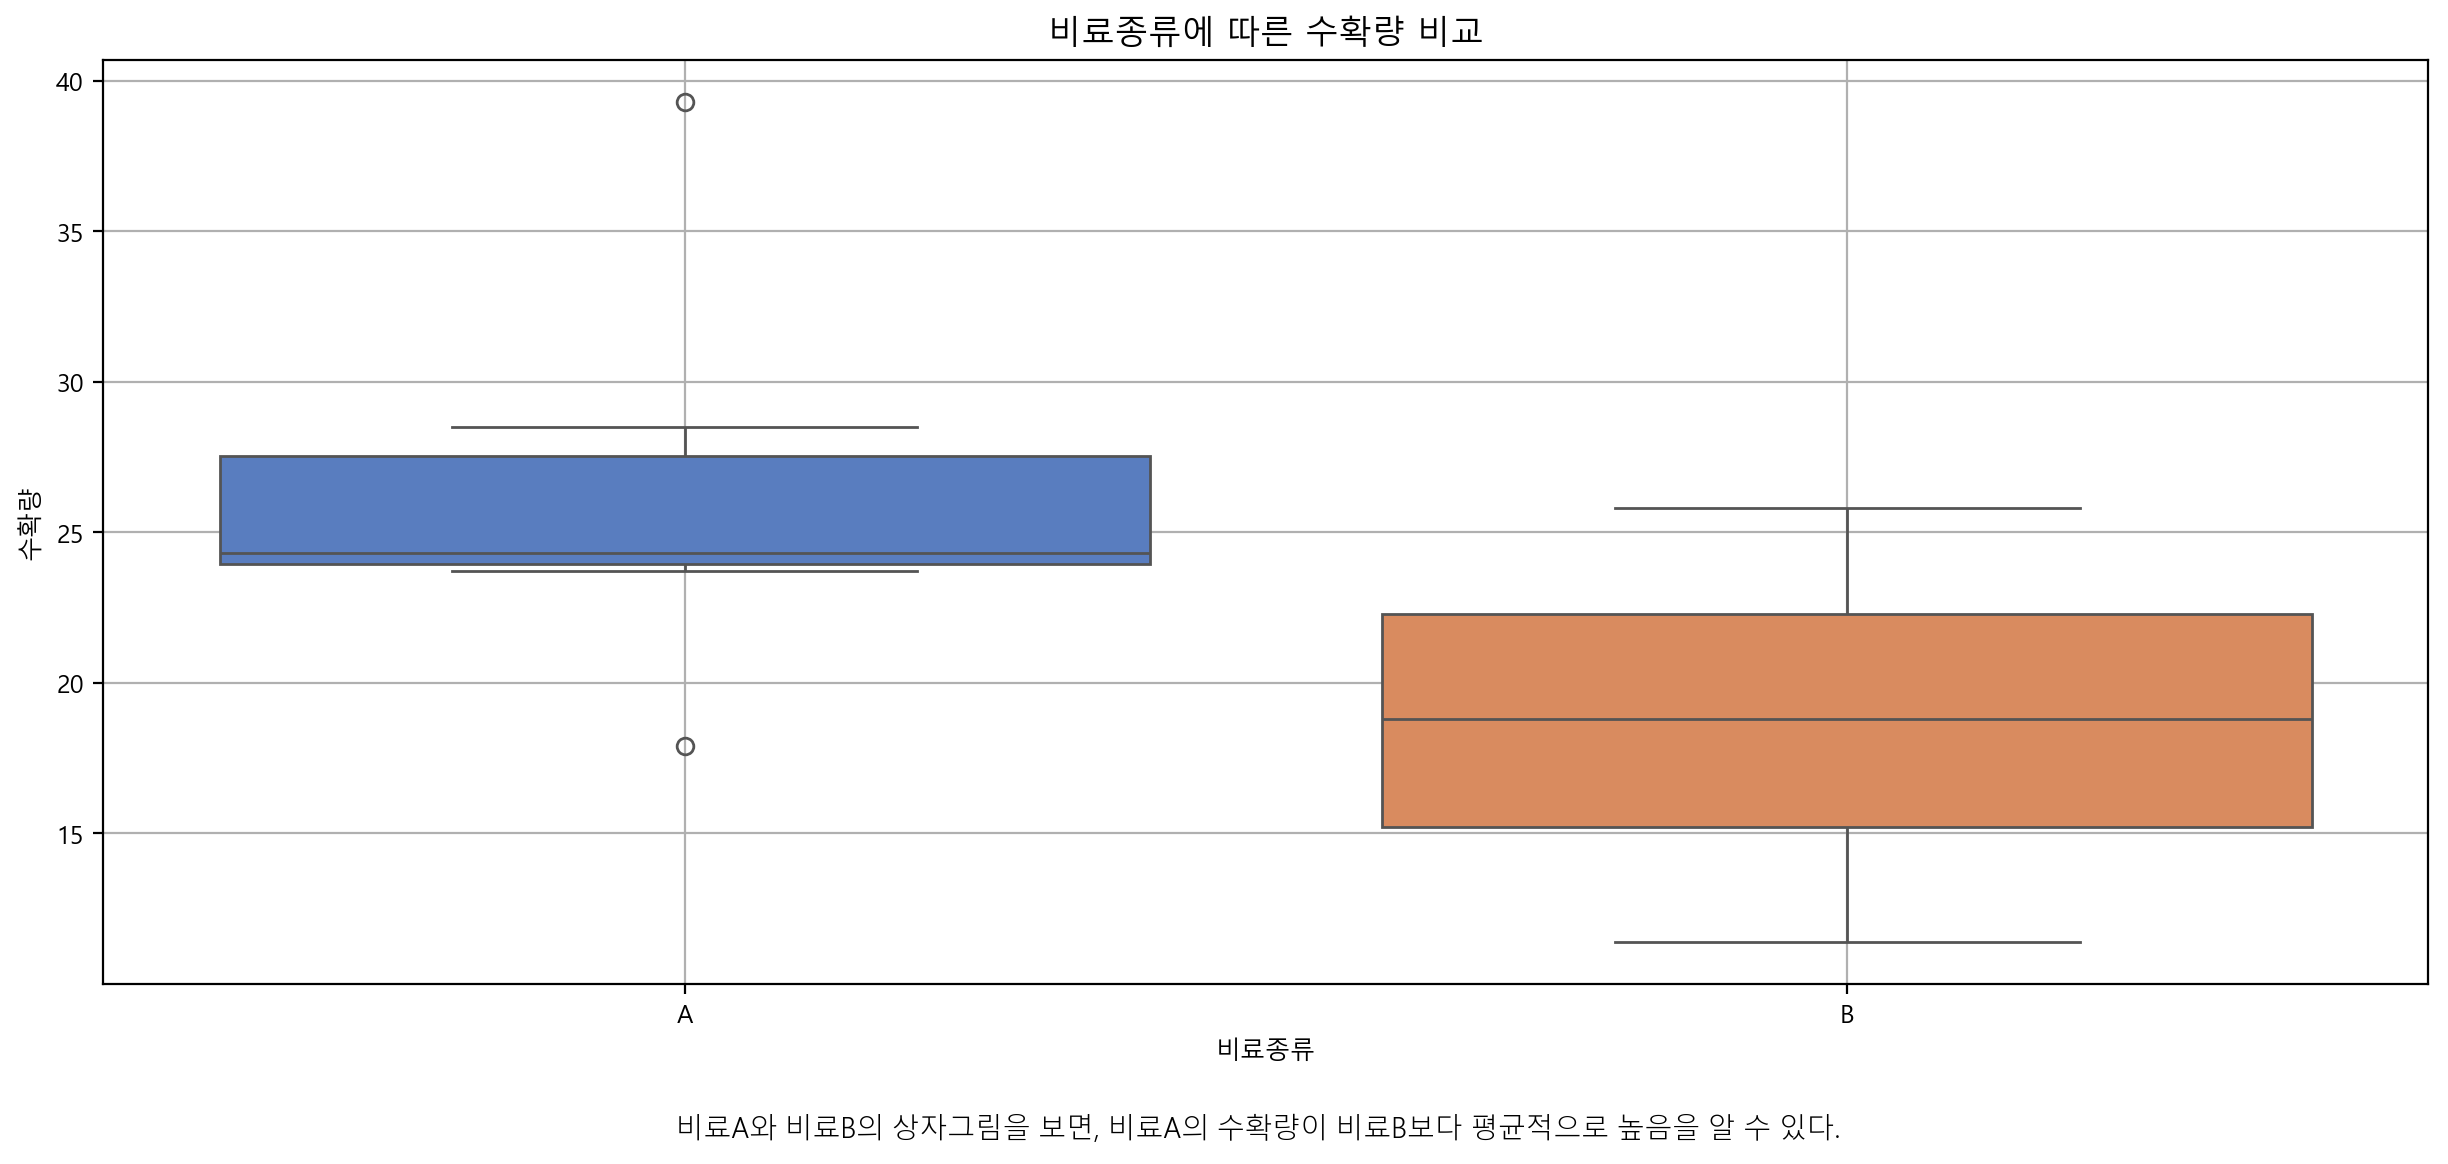

In [160]:
fig, ax = plt.subplots(1, 1)
# fig, ax2 = plt.subplots(1,1)   독립된 서브플롯


# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.boxplot(data=df, x='비료종류', y='수확량', palette="muted", ax=ax)


ax.title.set_text("비료종류에 따른 수확량 비교")
ax.title.set_fontsize(12)
ax.grid()


txt = """ 비료A와 비료B의 상자그림을 보면, 비료A의 수확량이 비료B보다 평균적으로 높음을 알 수 있다. """
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 10, "weight": "light"})




plt.show()               # 그래프 화면 표시
plt.close()              # 그래프 그리기 종료

## 문제4

다음은 통계학개론을 수강하는 두 학과(A, C)의 성적분포 데이터의 일부이다. 이 두 그룹을 비교하기 위한 기술통계량을 구하고 상자그림을 그려서 비교/분석하라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

> https://data.hossam.kr/pydata/analysis_grade.xlsx

| 학과 | C  | A  | A  | C  | A  | C  | A  | C  | C  | A  | C  | A  | A  | A  |
|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
| 점수 | 54 | 52 | 37 | 41 | 67 | 43 | 73 | 51 | 55 | 15 | 52 | 18 | 23 | 10 |

> 실제 엑셀 파일에는 위 표의 전치 형태로 저장되어 있습니다.

In [161]:
origin = read_excel("./연구과제 데이터/analysis_grade.xlsx")
df = origin.astype({"학과": "category", "점수":"int"})
df.set_index('학과')

,점수
학과,
C,54
A,52
A,37
C,41
A,67
C,43
A,73
C,51
C,55


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32508\1854577205.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=df, x='학과', y='점수', palette="muted", ax=ax)


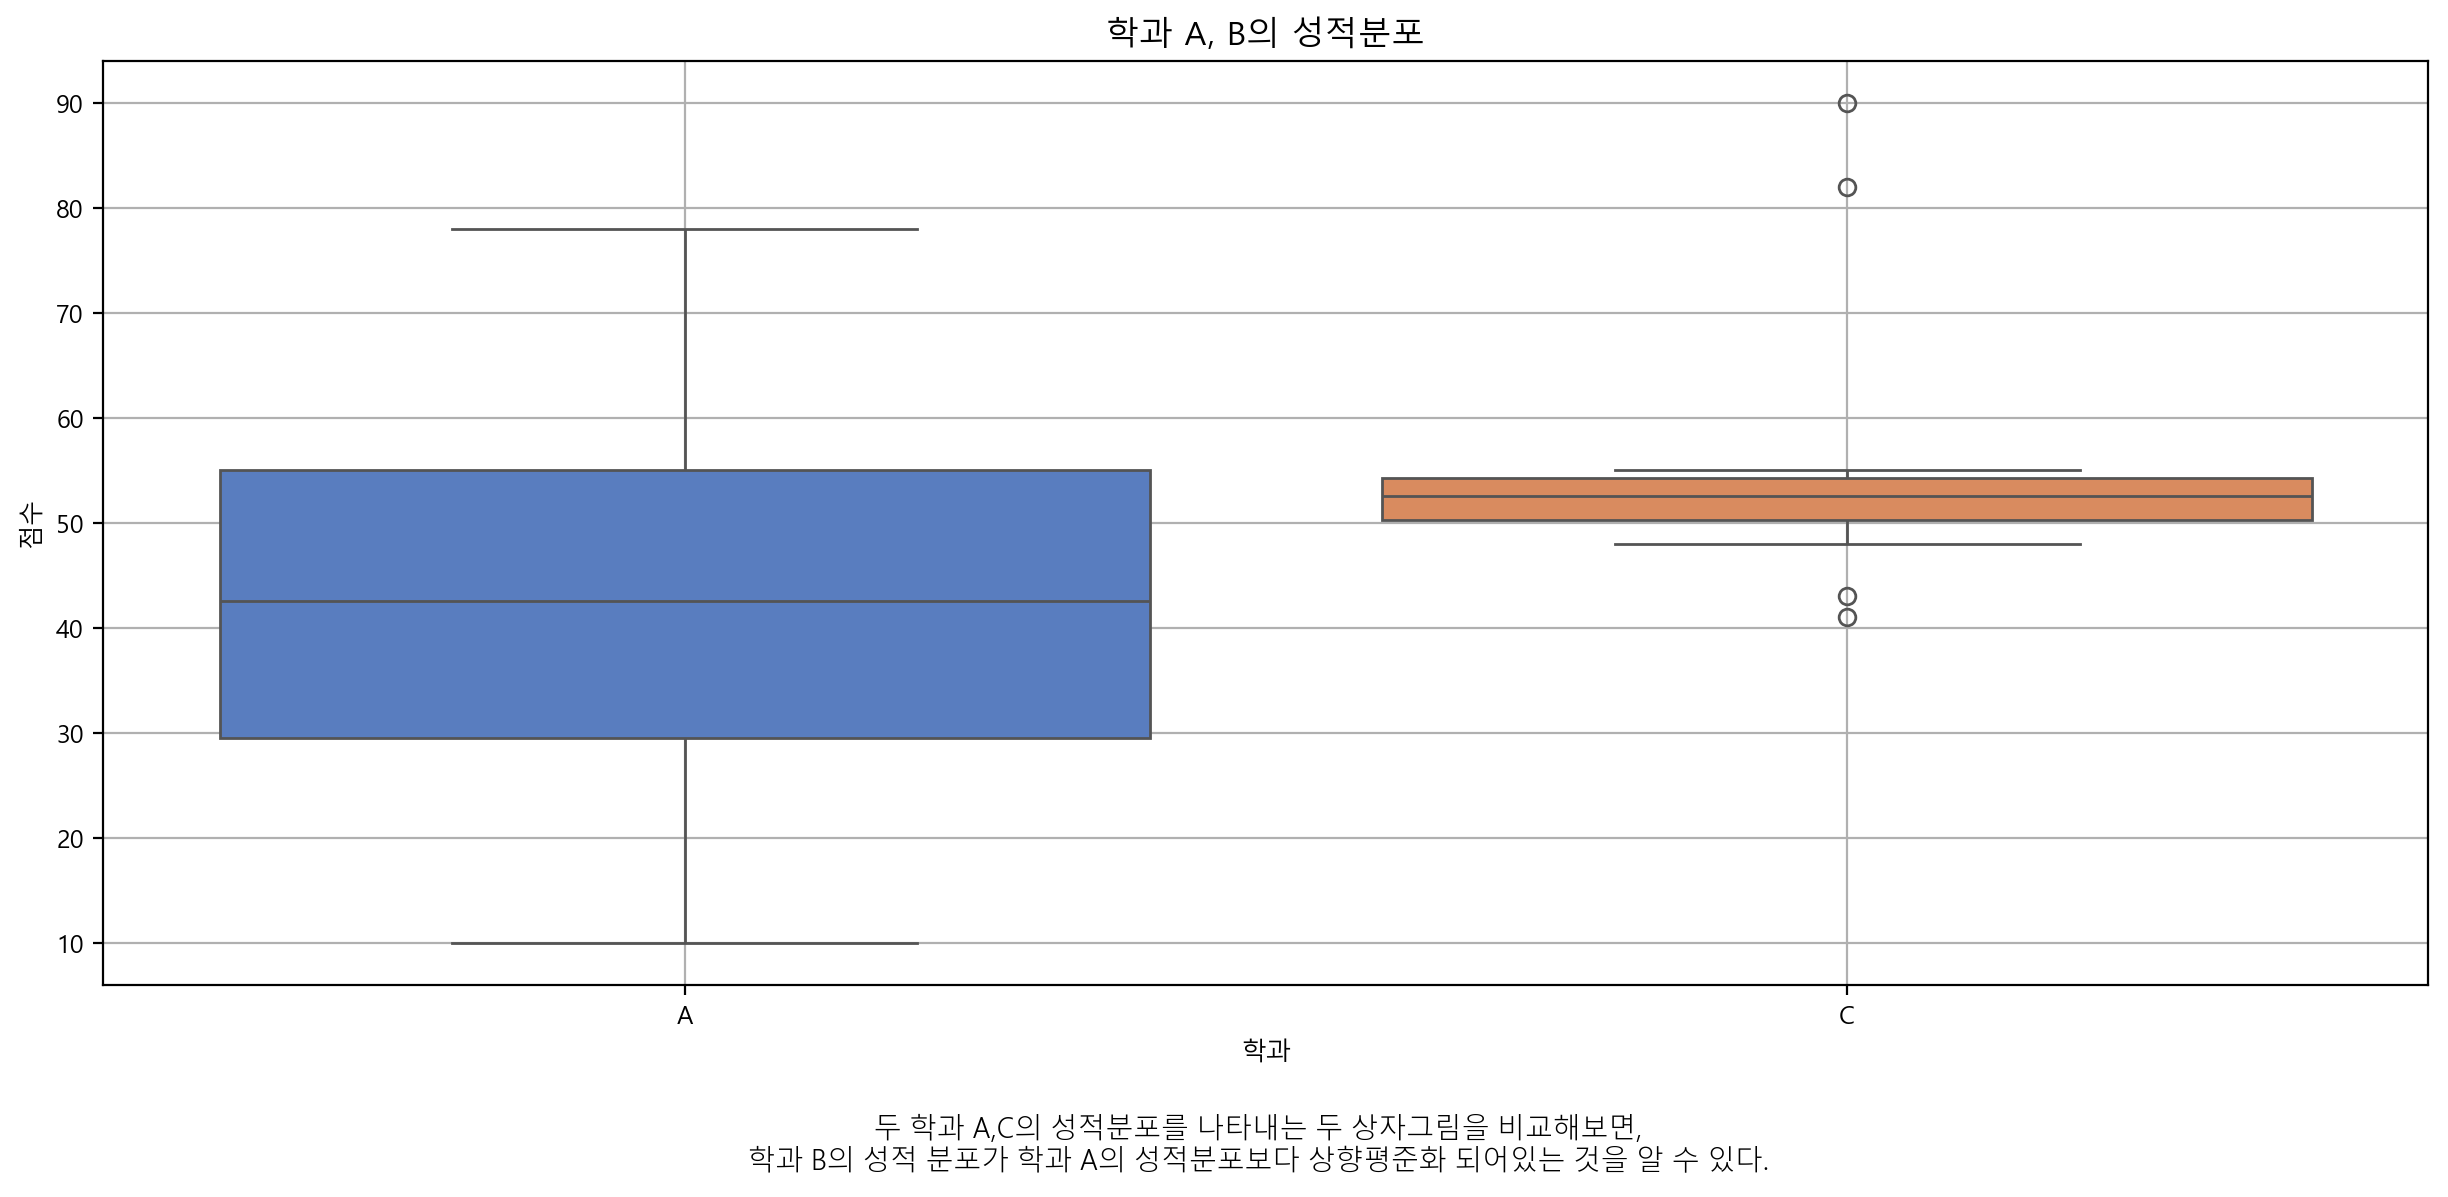

In [166]:
fig, ax = plt.subplots(1, 1)
# fig, ax2 = plt.subplots(1,1)   독립된 서브플롯


# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.boxplot(data=df, x='학과', y='점수', palette="muted", ax=ax)


ax.title.set_text("학과 A, B의 성적분포")
ax.title.set_fontsize(12)
ax.grid()


txt = """ 두 학과 A,C의 성적분포를 나타내는 두 상자그림을 비교해보면, \n 학과 B의 성적 분포가 학과 A의 성적분포보다 상향평준화 되어있는 것을 알 수 있다. """
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 10, "weight": "light"})




plt.show()               # 그래프 화면 표시
plt.close()              # 그래프 그리기 종료

## 문제5

다음은 통계학 전공(STAT) 학생과 전산학 전공(COMP) 학생의 통계학 과목에 대한 중간고사 성적과 기말시험 성적을 나타낸 표이다.

> https://data.hossam.kr/pydata/stat_comp_grade.xlsx

| 전공   | 중간고사 | 기말고사 |
|------|------|------|
| STAT | 34   | 86   |
| STAT | 50   | 77   |
| STAT | 75   | 74   |
| COMP | 76   | 96   |
| COMP | 61   | 78   |
| COMP | 65   | 40   |
| COMP | 31   | 68   |
| STAT | 47   | 57   |
| STAT | 94   | 82   |
| COMP | 49   | 57   |
| STAT | 38   | 53   |
| STAT | 65   | 70   |
| STAT | 47   | 60   |
| STAT | 88   | 95   |
| COMP | 80   | 85   |
| COMP | 87   | 90   |
| STAT | 92   | 95   |
| STAT | 70   | 80   |
| STAT | 78   | 85   |
| COMP | 76   | 85   |

(1) 전공에서 STAT를 1로, COMP를 2로 변환한 레이블을 적용하라.

(2) 중간고사 및 기말고사 성적에 대한 각종 기술통계량을 구하고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

(3) 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

(4) 전공별로 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, (3)번의 결과와 비교 하라.


In [207]:
from pandas import merge, concat

In [244]:
origin = read_excel("./연구과제 데이터/stat_comp_grade.xlsx", index_col="전공")
origin.reset_index(inplace=True)
origin.reset_index(inplace=True)
origin

,index,전공,중간고사,기말고사
0,0,STAT,34,86
1,1,STAT,50,77
2,2,STAT,75,74
3,3,COMP,76,96
4,4,COMP,61,78
5,5,COMP,65,40
6,6,COMP,31,68
7,7,STAT,47,57
8,8,STAT,94,82
9,9,COMP,49,57


In [204]:
r2 = origin.query("전공 == 'STAT'")
r2 ['전공'] = 1
r1 = origin.query("전공 == 'COMP'")
r1['전공'] = 2

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32508\2719371546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r2 ['전공'] = 1
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32508\2719371546.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r1['전공'] = 2


In [209]:
r=concat([r1, r2])
r.reset_index(inplace=True, drop=True)

In [247]:
mdf = melt(r, id_vars='전공', value_vars=['중간고사', '기말고사'], var_name = '시험',value_name = '시험성적')
mdf

,전공,시험,시험성적
0,2,중간고사,76
1,2,중간고사,61
2,2,중간고사,65
3,2,중간고사,31
4,2,중간고사,49
5,2,중간고사,80
6,2,중간고사,87
7,2,중간고사,76
8,1,중간고사,34
9,1,중간고사,50


In [257]:
stat = pivot_table(mdf,
            index = '전공', 
            columns = '시험',
            values = '시험성적',
            aggfunc = ["max", "min","sum","mean","var","std"]
)
stat

max       min       sum            mean                    var  \
시험 기말고사 중간고사 기말고사 중간고사 기말고사 중간고사       기말고사       중간고사        기말고사   
전공                                                                   
1    95   94   53   34  914  778  76.166667  64.833333  194.696970   
2    96   87   40   31  599  525  74.875000  65.625000  353.267857   

                      std             
시험        중간고사       기말고사       중간고사  
전공                                    
1   450.515152  13.953386  21.225342  
2   339.410714  18.795421  18.423103

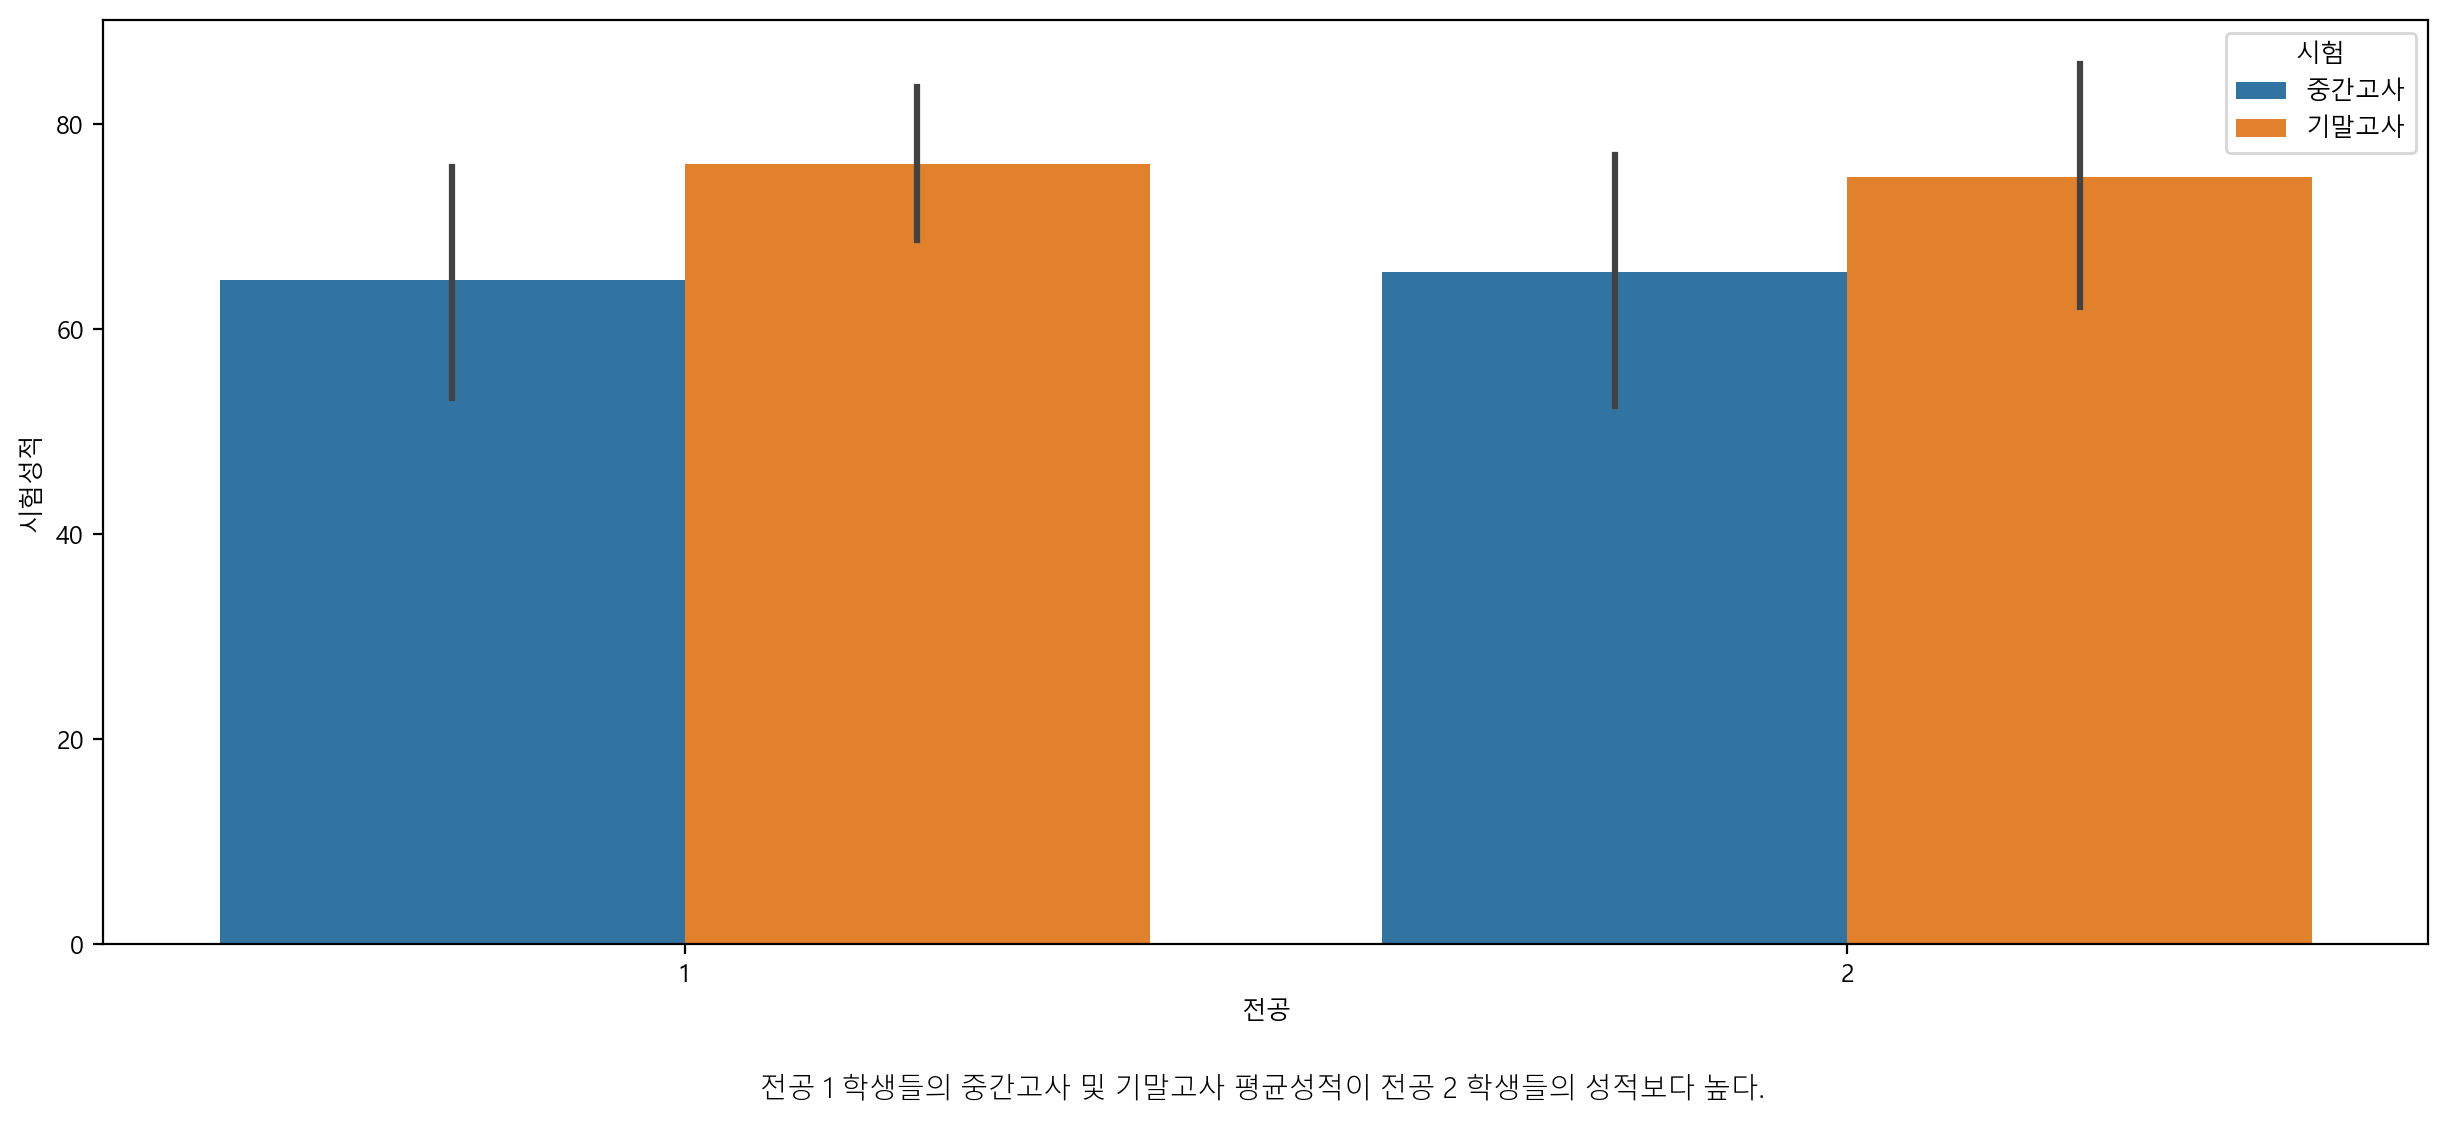

In [318]:
sb.barplot(data=mdf, x='전공', y='시험성적', hue = '시험',estimator='mean')
# plt.xticks([1, 2], ['전공1','전공2'])
txt = """ 전공 1 학생들의 중간고사 및 기말고사 평균성적이 전공 2 학생들의 성적보다 높다."""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 10, "weight": "light"})
plt.show()
plt.close()

In [258]:
print("\n 전공 1 학생들의 중간고사 및 기말고사 성적이 평균적으로 \n 전공 2 학생들의 성적보다 높으며, 학생들의 수준의 차이가 작다.")


 전공 1 학생들의 중간고사 및 기말고사 성적이 평균적으로 
 전공 2 학생들의 성적보다 높으며, 학생들의 수준의 차이가 작다.


In [290]:
mdf.set_index = ('전공')

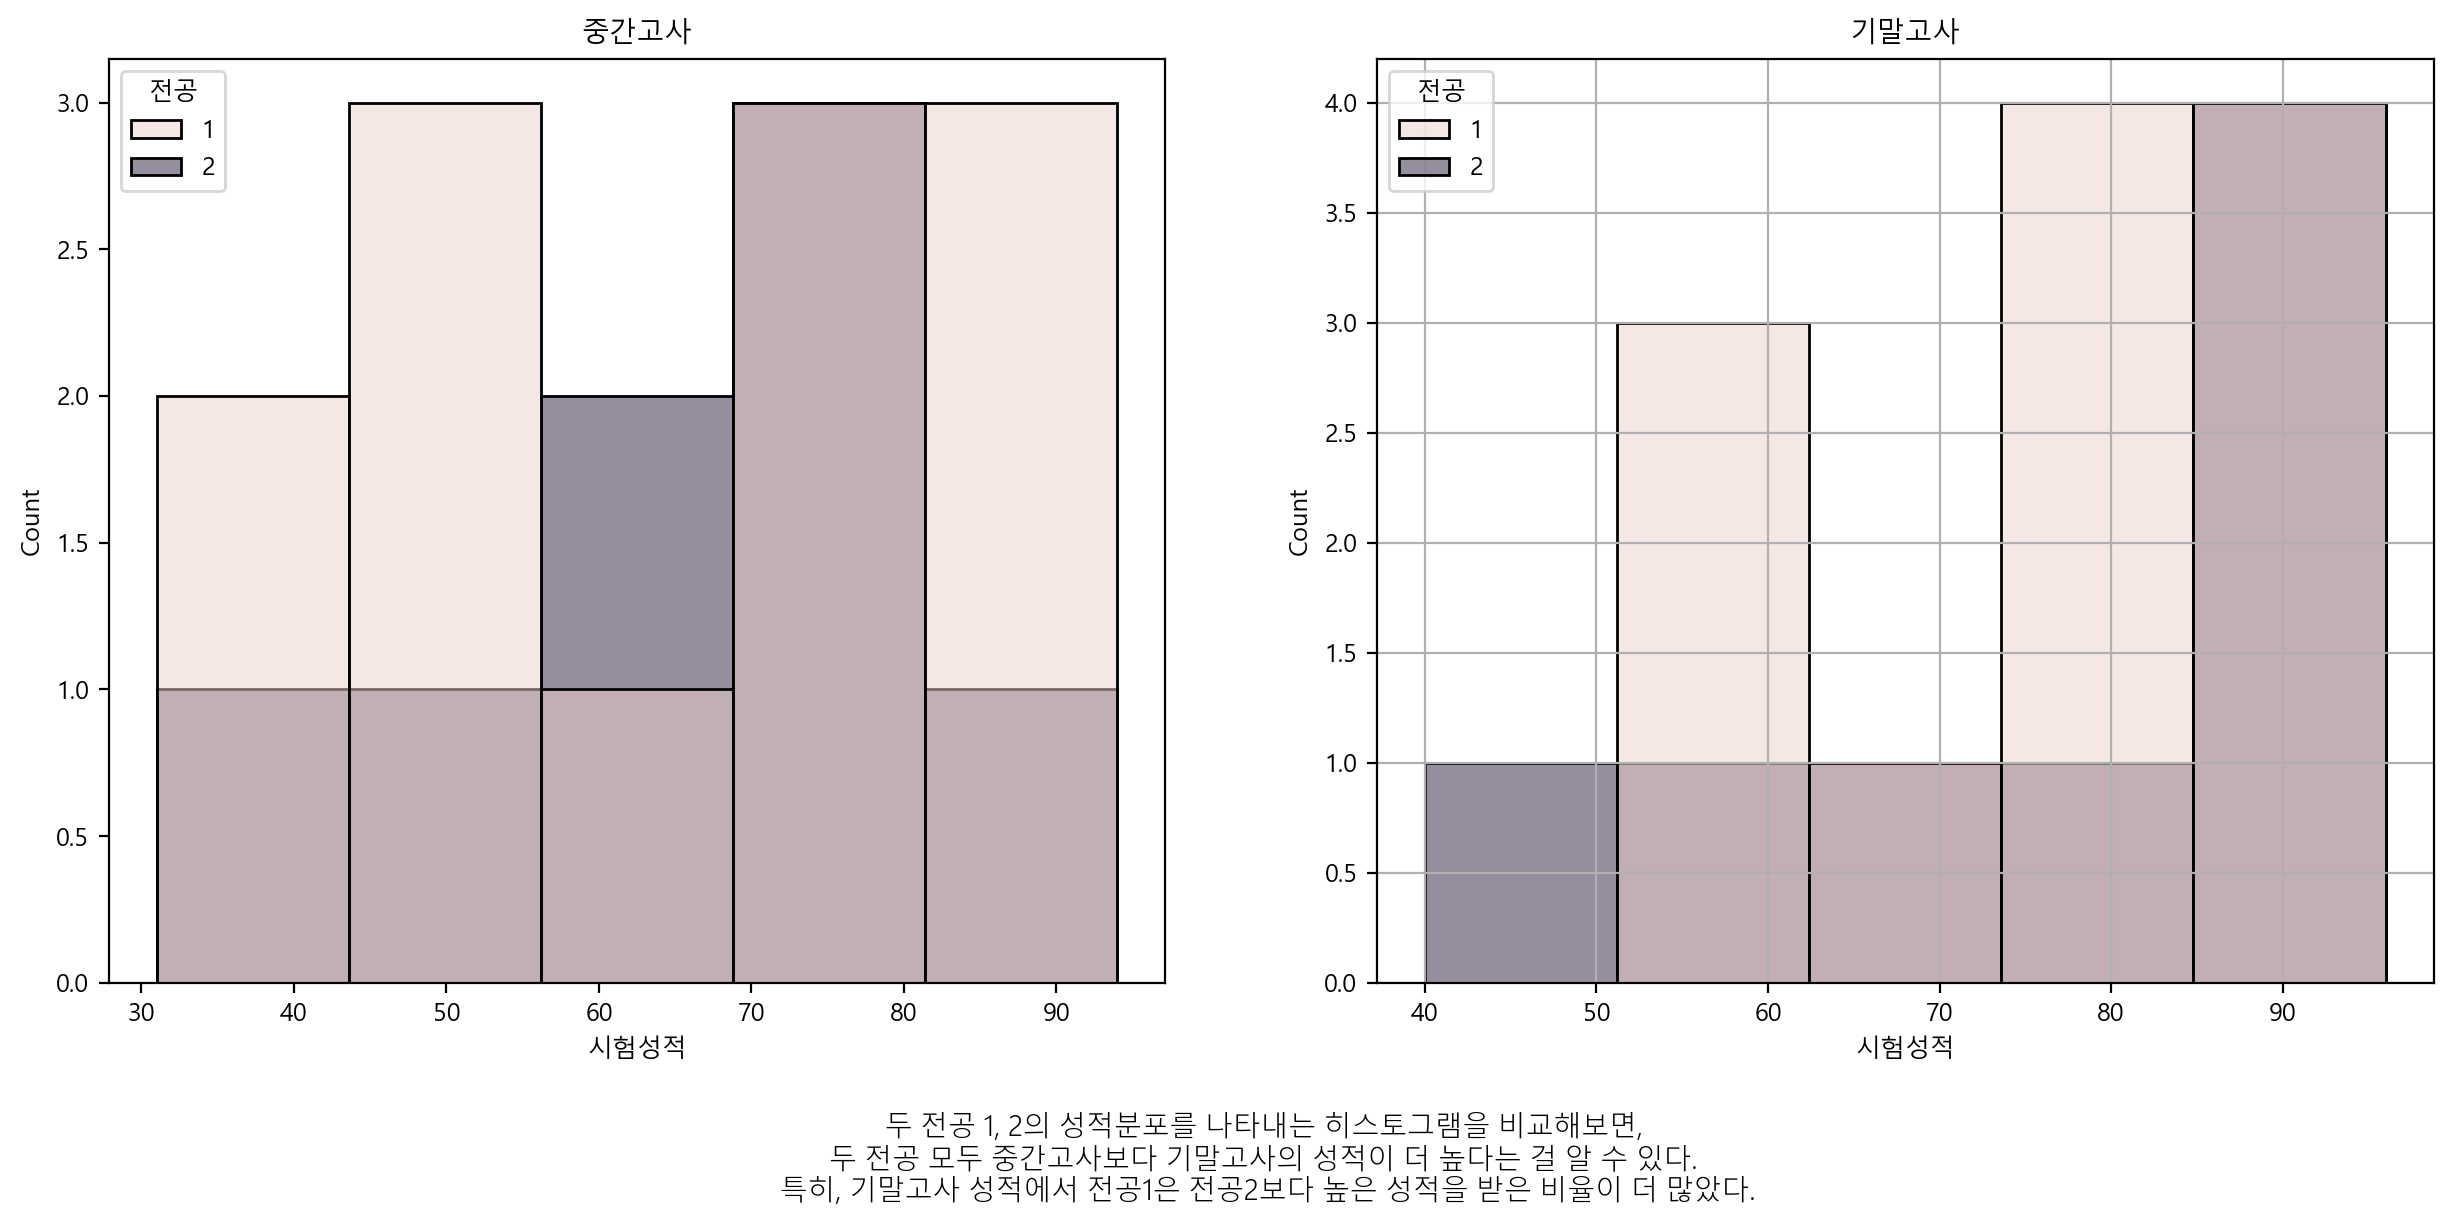

In [300]:
# plt.figure(figsize=(10, 5), dpi=100)
# sb.histplot(data=mdf, x='시험성적', bins=10, kde=False, hue='시험')
# plt.grid()
# plt.title("전공별 시험성적")
# plt.show()
# plt.close()


fig, (ax1,ax2) = plt.subplots(1, 2)
# fig, ax2 = plt.subplots(1,1) 
# ax2 = ax1.twinx()


# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.histplot(data=mdf.loc[mdf['시험']=='중간고사'], x='시험성적', bins=5, color='#ff6600', ax=ax1, hue='전공')
sb.histplot(data=mdf.loc[mdf['시험']=='기말고사'], x='시험성적', bins=5, color='#0066ff', ax=ax2, hue='전공')

ax1.title.set_text("중간고사")
ax1.title.set_fontsize(10)

ax2.title.set_text("기말고사")
ax2.title.set_fontsize(10)

txt = """ 두 전공 1, 2의 성적분포를 나타내는 히스토그램을 비교해보면, \n두 전공 모두 중간고사보다 기말고사의 성적이 더 높다는 걸 알 수 있다.\n 특히, 기말고사 성적에서 전공1은 전공2보다 높은 성적을 받은 비율이 더 많았다."""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 10, "weight": "light"})
# ax1.xlabel("중간고사")   
# ax2.xlabel("기말고사")   # x축 제목
# plt.ylabel("시험성적")   # y축 제목
plt.grid()
plt.show()               # 그래프 화면 표시
plt.close()              # 그래프 그리기 종료

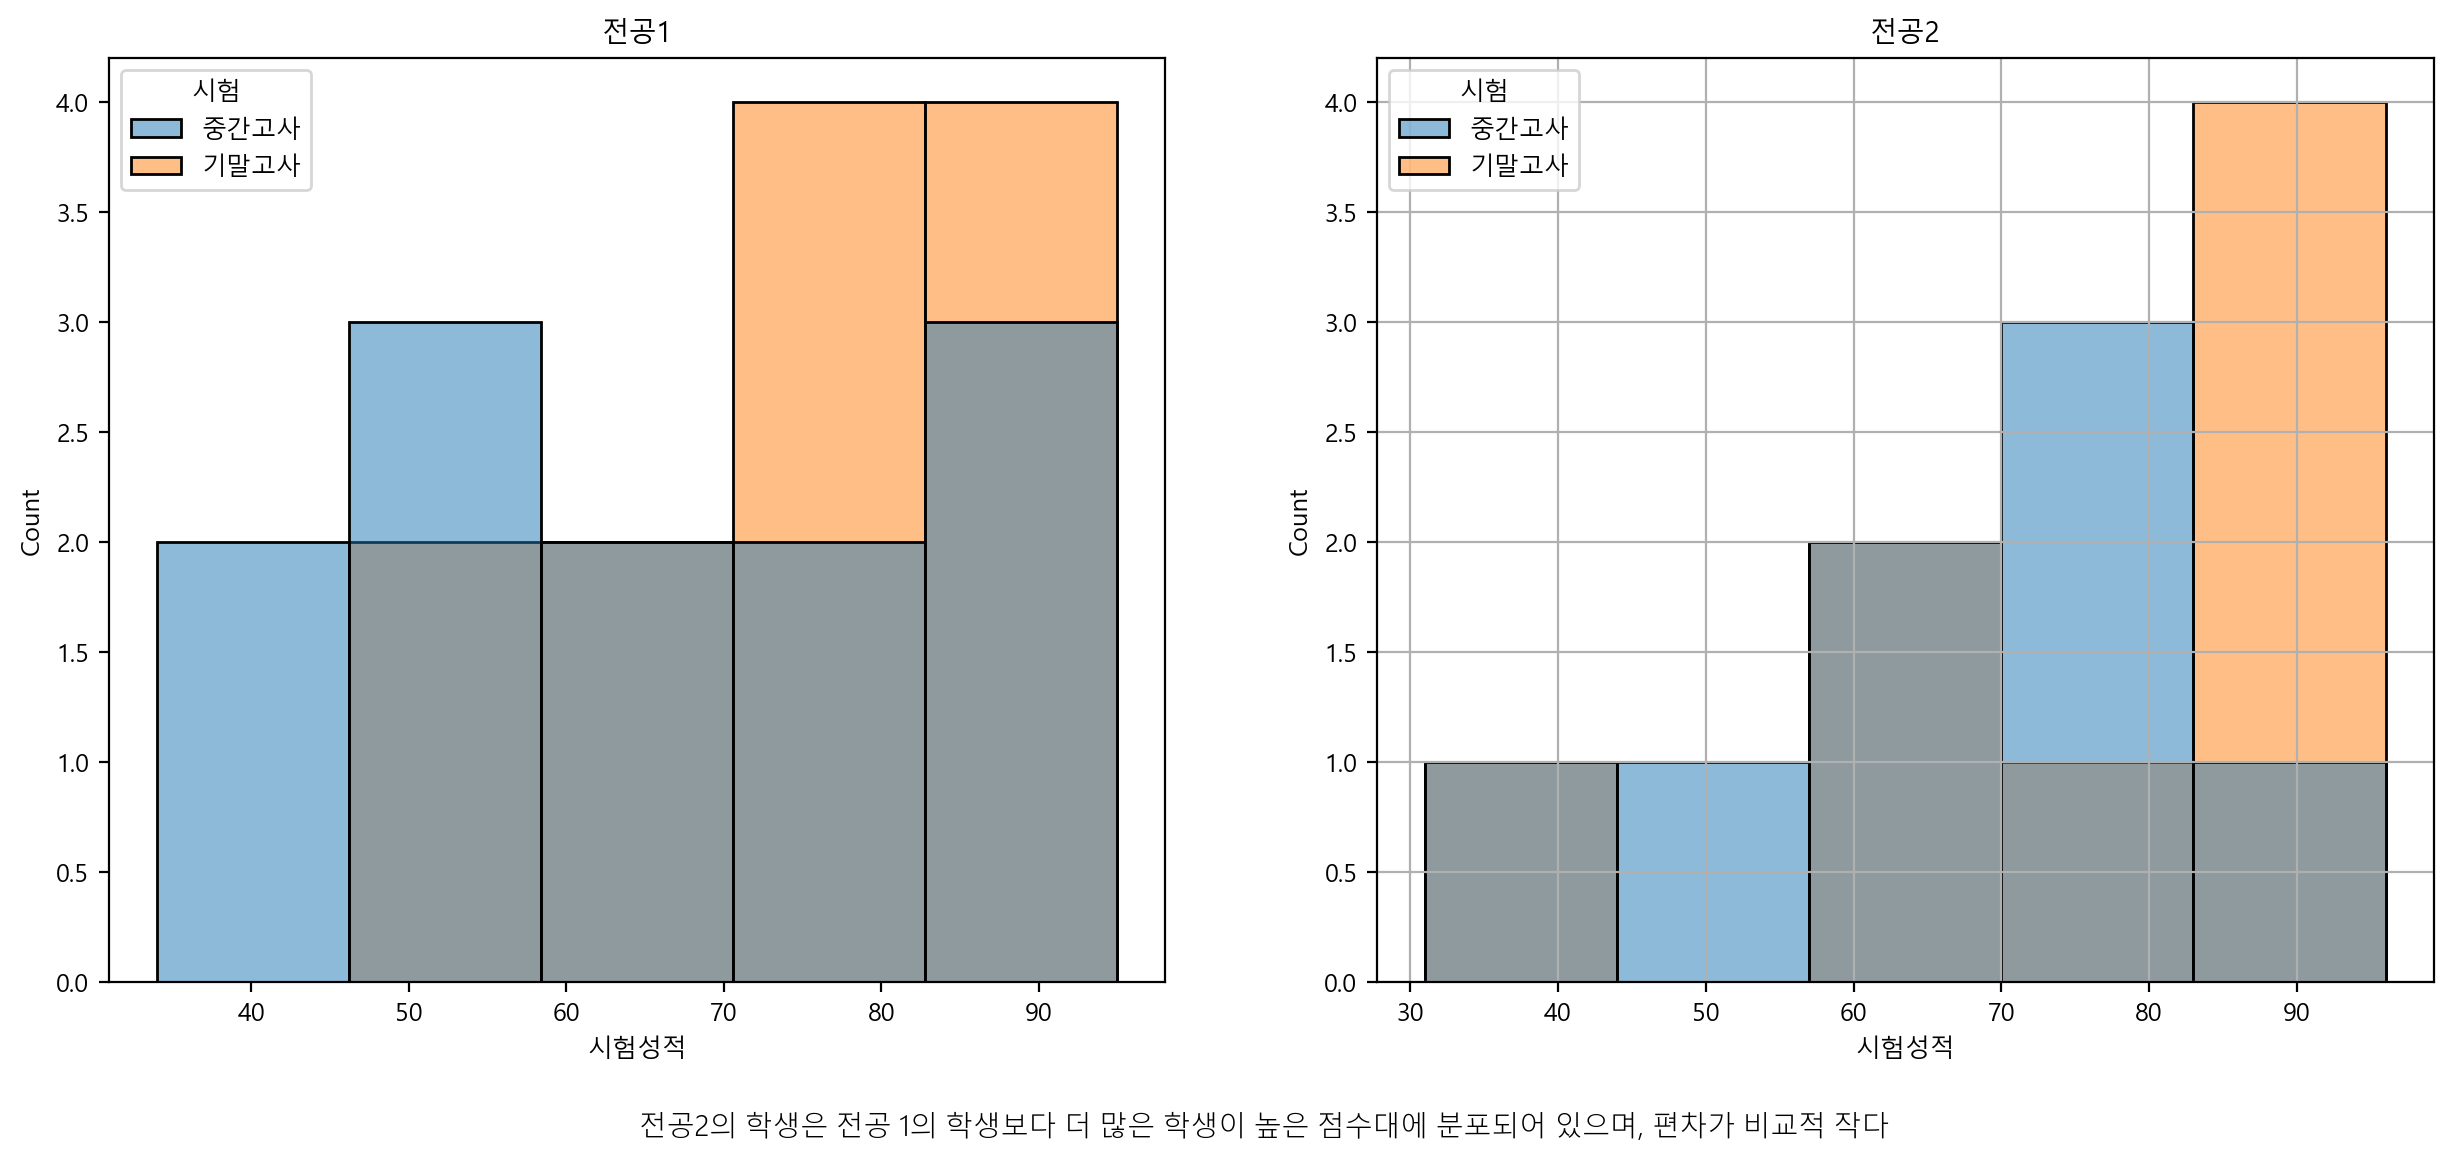

In [320]:
fig, (ax1,ax2) = plt.subplots(1, 2)
# fig, ax2 = plt.subplots(1,1) 
# ax2 = ax1.twinx()


# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.histplot(data=mdf.loc[mdf['전공']==1], x='시험성적', bins=5, color='#ff6600', ax=ax1, hue='시험')
sb.histplot(data=mdf.loc[mdf['전공']==2], x='시험성적', bins=5, color='#0066ff', ax=ax2, hue='시험')

ax1.title.set_text("전공1")
ax1.title.set_fontsize(10)

ax2.title.set_text("전공2")
ax2.title.set_fontsize(10)

txt = """전공2의 학생은 전공 1의 학생보다 더 많은 학생이 높은 점수대에 분포되어 있으며, 편차가 비교적 작다"""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 10, "weight": "light"})
# ax1.xlabel("중간고사")   
# ax2.xlabel("기말고사")   # x축 제목
# plt.ylabel("시험성적")   # y축 제목
plt.grid()
plt.show()               # 그래프 화면 표시
plt.close()              # 그래프 그리기 종료

## 문제6

Wage 데이터 셋은 경제 및 노동 시장에 관련된 정보를 담고 있는 데이터셋이다.

이 데이터셋은 미국에서 수집된 임금에 대한 정보를 포함하고 있다.

> https://data.hossam.kr/pydata/wage.xlsx

| year | age  | maritl           | race     | education       | region             | jobclass       | health         | health_ins | logwage | wage  |
|------|------|------------------|----------|-----------------|--------------------|----------------|----------------|------------|---------|-------|
| 2006 | 18.0 | 1. Never Married | 1. White | 1. < HS Grad    | 2. Middle Atlantic | 1. Industrial  | 1. <=Good      | 2. No      | 4.3     | 75.0  |
| 2004 | 24.0 | 1. Never Married | 1. White | 4. College Grad | 2. Middle Atlantic | 2. Information | 2. >=Very Good | 2. No      | 4.3     | 70.5  |
| 2003 | 45.0 | 2. Married       | 1. White | 3. Some College | 2. Middle Atlantic | 1. Industrial  | 1. <=Good      | 1. Yes     | 4.9     | 131.0 |
| 2003 | 43.0 | 2. Married       | 3. Asian | 4. College Grad | 2. Middle Atlantic | 2. Information | 2. >=Very Good | 1. Yes     | 5.0     | 154.7 |
| 2005 | 50.0 | 4. Divorced      | 1. White | 2. HS Grad      | 2. Middle Atlantic | 2. Information | 1. <=Good      | 1. Yes     | 4.3     | 75.0  |

각 변수는 다음과 같은 의미를 갖는다.

| 변수명 | 의미 |
|--|--|
| year | 탄생년도 |
| age | 나이 |
| maritl | 결혼여부 |
| race | 근로자의 인종 |
| education | 교육수준 |
| region | 지역 |
| jobclass | 직군 |
| health | 건상상태 |
| health_ins | 건강보험 가입 여부 |
| logwage | 임금(로그값) |
| wage | 임금 |

이 데이터셋을 활용하여 다음 물음에 답하시오.

1. 데이터를 로드하여 명목형 변수를 `1`, `2` 등으로 레이블링 하시오. 값의 종류는 데이터프레임으로부터 조회하여 확인하시오.

2. 레이블링 된 명목형 변수를 `category` 타입으로 변경하시오.

3. 수치형 변수에 대한 요약 통계를 확인하고 설명하시오 (상자그림 제외)

4. 명목형 변수에 대한 기술 통계를 수행하고 설명하시오.

5. 결혼 여부에 따른 임금 수준을 비교하고자 한다. 결혼 여부에 따라 서브플롯을 구성하여 임금 수준을 히스토그램으로 시각화 하고 설명하시오.

6. 교육 수준에 따른 임금에 대한 히스토그램을 시각화 하고 설명하시오. 교육수준별로 그래프를 나누어 서브플롯으로 제시해야 합니다.

7. 직군별 건강상태를 확인하고자 한다. 적절한 형태로 데이터를 재배치하고 설명하시오.

8. 교육 수준을 인종 비율에 따라 설명하고자 한다. 적절한 시각화 자료를 제시하고 설명하시오.

In [348]:
origin = read_excel("./연구과제 데이터/wage.xlsx", index_col="year")
origin.reset_index(inplace=True)

In [335]:
origin.dtypes

year            int64
age             int64
maritl         object
race           object
education      object
region         object
jobclass       object
health         object
health_ins     object
logwage       float64
wage          float64
dtype: object

In [336]:
origin.value_counts()

year  age  maritl            race      education           region              jobclass        health          health_ins  logwage   wage      
2007  46   2. Married        1. White  5. Advanced Degree  2. Middle Atlantic  2. Information  2. >=Very Good  1. Yes      5.641006  281.745971    2
2004  38   2. Married        1. White  5. Advanced Degree  2. Middle Atlantic  2. Information  2. >=Very Good  1. Yes      5.000000  148.413159    2
2003  50   2. Married        1. White  5. Advanced Degree  2. Middle Atlantic  2. Information  2. >=Very Good  1. Yes      4.903090  134.705375    2
      18   1. Never Married  2. Black  2. HS Grad          2. Middle Atlantic  1. Industrial   2. >=Very Good  1. Yes      4.255273  70.476020     1
2007  41   2. Married        1. White  2. HS Grad          2. Middle Atlantic  2. Information  2. >=Very Good  1. Yes      4.973128  144.478088    1
                                                                                                               

In [369]:
origin.reset_index(inplace=True)

In [370]:
origin['health_ins'] = origin['health_ins'].replace({"1. Yes": 1, "2. No": 2})
origin['health'] = origin['health'].replace({"2. >=Very Good": 2, "1. <=Good": 1})
origin['jobclass'] = origin['jobclass'].replace({"2. Information": 2, "1. Industrial": 1})
origin['region'] = origin['region'].replace({"2. Middle Atlantic": 2})
origin['education'] = origin['education'].replace({"1. < HS Grad": 1, "2. HS Grad": 2,"5. Advanced Degree": 5, "4. College Grad": 4, "3. Some College":3})
origin['race'] = origin['race'].replace({"1. White": 1, "2. Black": 2, "3. Asian": 3, "4. Other": 4})
origin['maritl'] = origin['maritl'].replace({"1. Never Married": 1, "2. Married": 2,"3. Widowed": 3, "4. Divorced": 4, "5. Separated":5})


In [396]:
origin

,index,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,0,2006,18,1,1,1,2,1,1,2,4.318063,75.043154
1,1,2004,24,1,1,4,2,2,2,2,4.255273,70.476020
2,2,2003,45,2,1,3,2,1,1,1,4.875061,130.982177
3,3,2003,43,2,3,4,2,2,2,1,5.041393,154.685293
4,4,2005,50,4,1,2,2,2,1,1,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,2008,44,2,1,3,2,1,2,1,5.041393,154.685293
2996,2996,2007,30,2,1,2,2,1,2,2,4.602060,99.689464
2997,2997,2005,27,2,2,1,2,1,1,2,4.193125,66.229408
2998,2998,2005,27,1,1,3,2,1,2,1,4.477121,87.981033


In [412]:
df = origin.astype({"maritl": "category",
               "race": "category",
               "education": "category",
               "region": "category",
               "jobclass": "category",
               "wage": "category",
               "logwage": "category"})

In [417]:
df.value_counts()

index  year  age  maritl  race  education  region  jobclass  health  health_ins  logwage           wage             
0      2006  18   1       1     1          2       1         1       2           4.31806333496276  75.04315401735154    1
2003   2006  50   4       1     4          2       2         1       1           5.03342375548695  153.4575153089614    1
1994   2009  34   2       1     3          2       1         2       2           4.74036268949424  114.4757132903472    1
1995   2004  62   2       1     4          2       2         2       1           4.8750612633917   130.9821773774607    1
1996   2007  44   2       1     1          2       1         2       1           4.65321251377534  104.9215065336639    1
                                                                                                                       ..
1002   2004  25   1       1     2          2       1         2       2           4.0               54.59815003314424    1
1003   2005  66   2       1  